In [1]:
# Importing some usefull libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
import scipy
from scipy.spatial.distance import pdist,cdist
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from sklearn.cluster import AgglomerativeClustering

**TASK**
<b>
1-	You are required to perform Exploratory data analysis on the following dataset.

2-	Plot as many charts and visuals to explain the data attributes and their nature.

3-	Find correlated variables and variables affecting the target variable the most.

4-	Remove the target variable and perform clustering to identify the different segments of customers visiting the site.

5-	You are required to use the table below and implement all the clustering algorithms studied in class. Assess cluster validity and suggest the best possible clustering algorithm for your use case. Analyze statistics for each cluster identified (refer to the first notebook of German credit card dataset).

6-	Change the hyper parameters of each algorithm tabulate the results.

7-	Describe characteristics of different clusters identified in the dataset.

8-	Since ground truth (labels) are present in the dataset, perform external validation (refer to cluster validation notebook) for each algorithm as well (Bonus Task: 5 marks)

9-	Explain your plots, reasons for using the plot, if there exists a problem (such as outliers) how did you solve it.?


In [2]:
# Loading the dataset inot a data Variable
data = pd.read_csv("online_shoppers_intention.csv")

In [3]:
# Looking the first five rows of data to inspect the values. 
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


|**Feature** | **Discription**|
|:-------:|:-----------------:|
|**Administrative**|Number of pages visited by the user dealing with account management like user profile|
|**Administrative Duration**|Total amount of time (in seconds) spent by the visitor on account management related pages|
|**Administrative Duration**|Total amount of time (in seconds) spent by the visitor on account management related pages|
|**Informational**|Number of pages visited by the visitor about website|
|**Informational Duration**|Total amount of time (in seconds) spent by the visitor on informational pages|
|**Product Related**|Number of pages visited by visitors about product related pages like product descriptions, reviews|
|**Product Related Duration**|Total amount of time (in seconds) spent by the visitor on product related pages|
|**Bounce Rate**|Average bounce rate value of the pages visited by the visitor|
|**Exit Rate**|Average exit rate value of the pages visited by the visitor.|
|**Page Value**|Average page value of the pages visited by the visitor|
|**Special Day**|How close the site visiting day is, to a special day.|
|**Month**|Month of the date of the visit.|
|**Operating System**|Operating system used by the visitor|
|**Browser**|The web browser used by the visitor.|
|**Region**|Geographic region from which the session has been started by the visitor.|
|**Traffic Type**|Traffic source by which the visitor has arrived at the website|
|**Visitor Type**|Visitor type is the type of the user and has 3 values “New Visitor”, “Returning Visitor” and “Other”.|
|**Weekend**|It is a boolean value indicating whether the date of the visit is weekend.|
|**Revenue**|This is the class label indicating whether the visit has completed a transaction thus generating revenue.|




In [4]:
# used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
#to see the data types categorical or numerical
data.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [6]:
# to check the missing values in data
data.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [7]:
# to see the percetage of missing values
data.isnull().sum()/data.shape[0]

Administrative             0.001135
Administrative_Duration    0.001135
Informational              0.001135
Informational_Duration     0.001135
ProductRelated             0.001135
ProductRelated_Duration    0.001135
BounceRates                0.001135
ExitRates                  0.001135
PageValues                 0.000000
SpecialDay                 0.000000
Month                      0.000000
OperatingSystems           0.000000
Browser                    0.000000
Region                     0.000000
TrafficType                0.000000
VisitorType                0.000000
Weekend                    0.000000
Revenue                    0.000000
dtype: float64

# Uni-varial Analysis

it is the analysis on one variable where we could understand the data more consise and clear
from the given number we have False and True values in our class variable so the number is given below

In [8]:
data["Revenue"].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

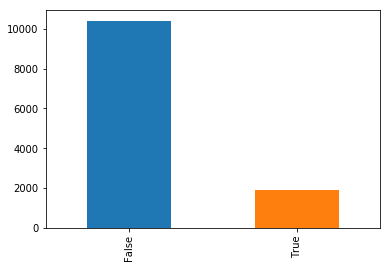

In [9]:
data["Revenue"].value_counts().plot('bar')

In [10]:
# Now bit understand the purchasing trend either people buy on weekend or not so
data["Weekend"].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

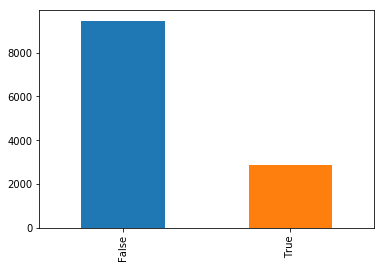

In [11]:
data["Weekend"].value_counts().plot('bar')

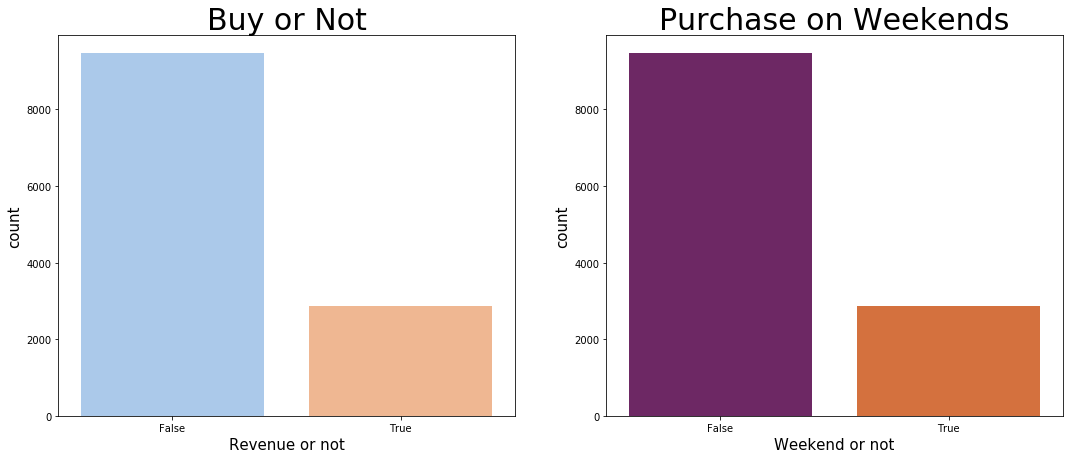

In [12]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.countplot(data['Weekend'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)


# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(data['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

In [13]:
# Number of Vistors Type
data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [14]:
data.Browser.value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

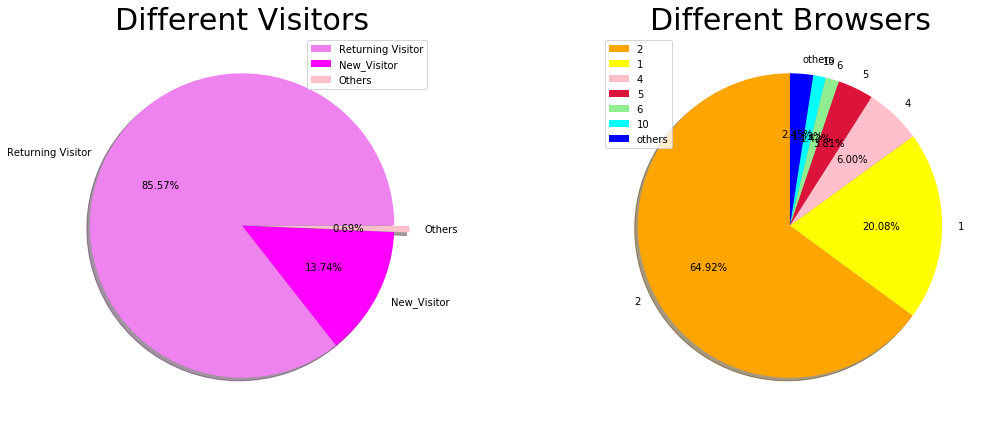

In [15]:
# plotting a pie chart for Visitor

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()

# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

from these pie chart it is clearly be understand about the visitor feature and browser so from the pie chart of visitor most of the values we gor from Returning visitor and in browser we have 64.9% of browser 2 i think it is a chrom bowser.haha

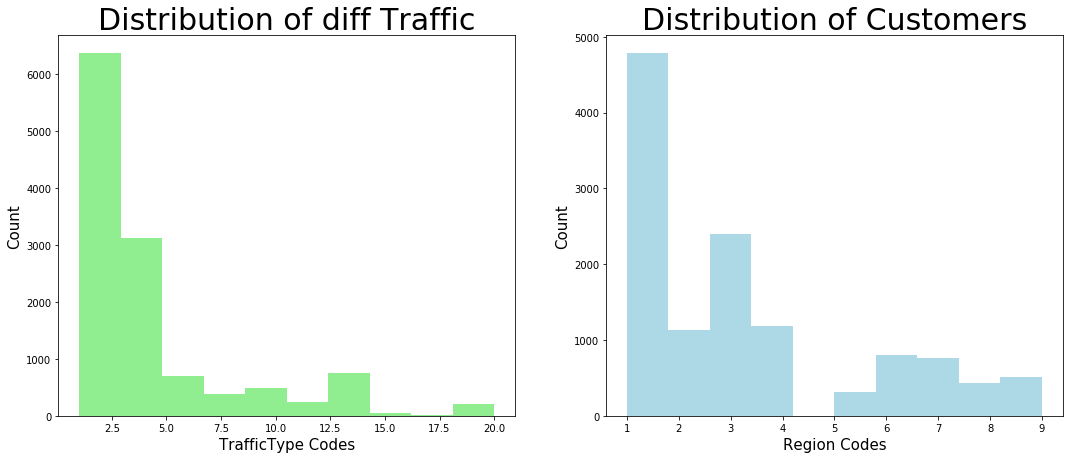

In [16]:
# visualizing the distribution of customers around the Region

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(data['TrafficType'], color = 'lightgreen')
plt.title('Distribution of diff Traffic',fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# visualizing the distribution of customers around the Region

plt.subplot(1, 2, 2)
plt.hist(data['Region'], color = 'lightblue')
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

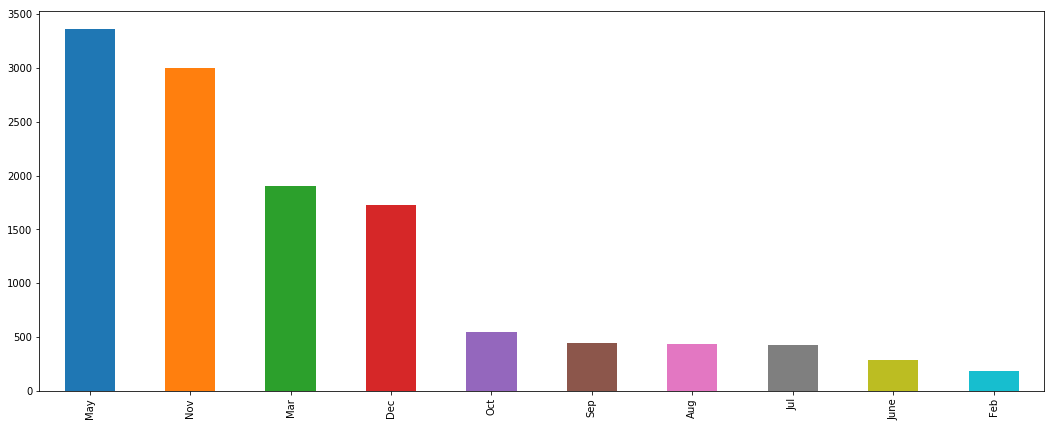

In [17]:
#checking the months with most no.of customers visiting the online shopping sites

data['Month'].value_counts().plot("bar")

In [18]:
data['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [19]:
# plotting a pie chart for share of special days

size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

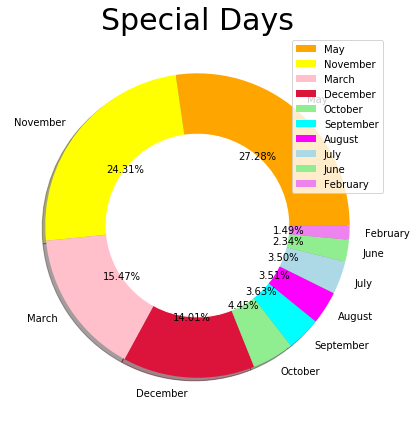

In [20]:
circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Special Days', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

plt.show()

## Bi-Variant Analysis:

This is all about to see the relation and affect the other variable to the class variable to use diff kind of charts to understand the Relation with Information duration, Administrative Duration, Product related duration Finally the Exit rate

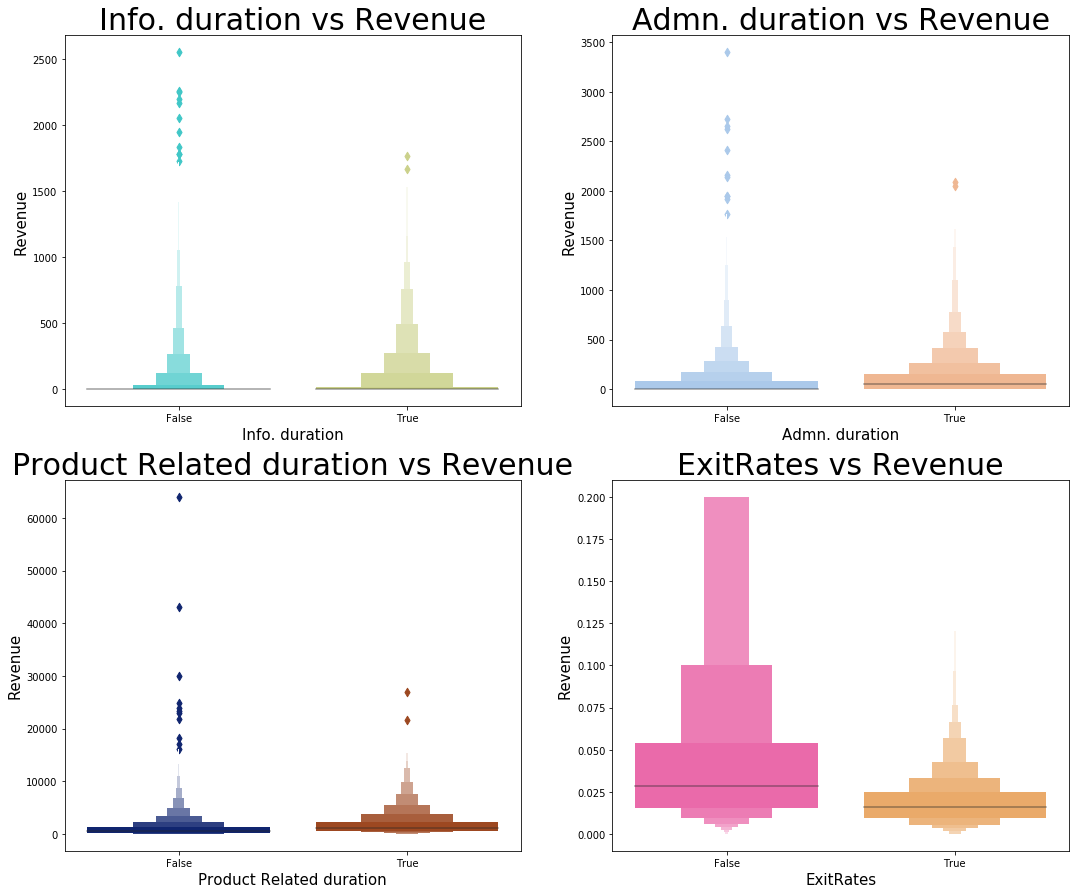

In [21]:
# product related duration vs revenue

plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(2, 2, 1)
sns.boxenplot(data['Revenue'], data['Informational_Duration'], palette = 'rainbow')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 2)
sns.boxenplot(data['Revenue'], data['Administrative_Duration'], palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 30)
plt.xlabel('Admn. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 3)
sns.boxenplot(data['Revenue'], data['ProductRelated_Duration'], palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# exit rate vs revenue

plt.subplot(2, 2, 4)
sns.boxenplot(data['Revenue'], data['ExitRates'], palette = 'spring')
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)


plt.show()


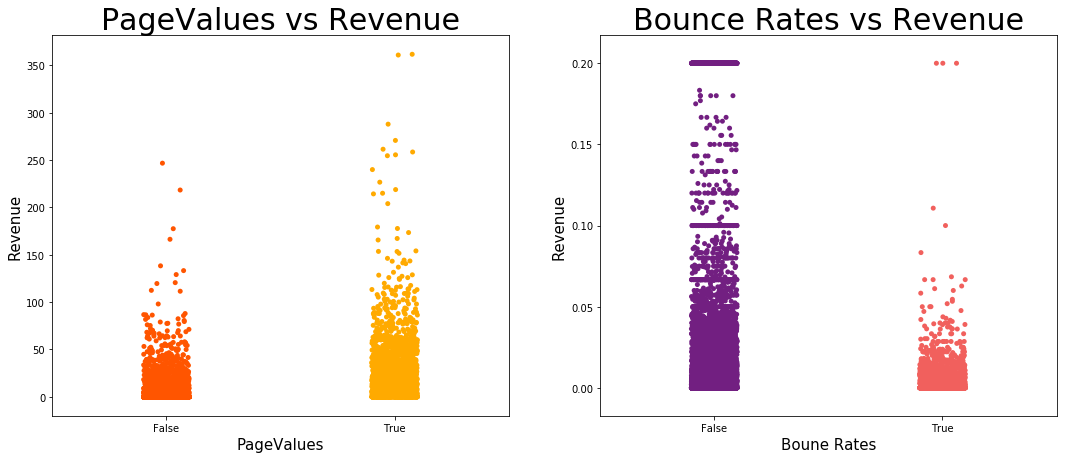

In [22]:
# page values vs revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.stripplot(data['Revenue'], data['PageValues'], palette = 'autumn')
plt.title('PageValues vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# bounce rates vs revenue
plt.subplot(1, 2, 2)
sns.stripplot(data['Revenue'], data['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.show()

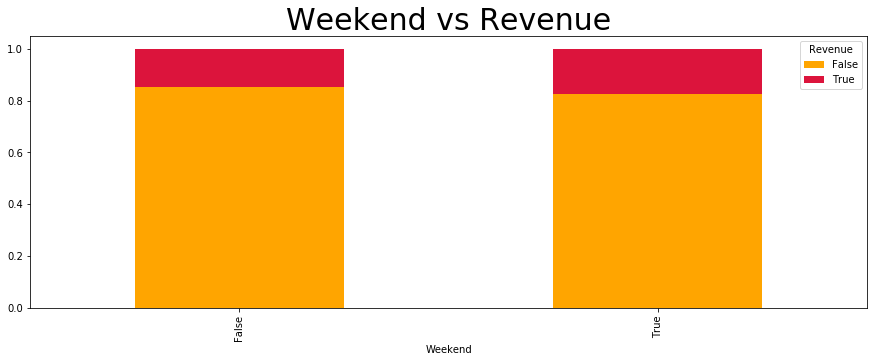

In [23]:
# weekend vs Revenue

df = pd.crosstab(data['Weekend'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

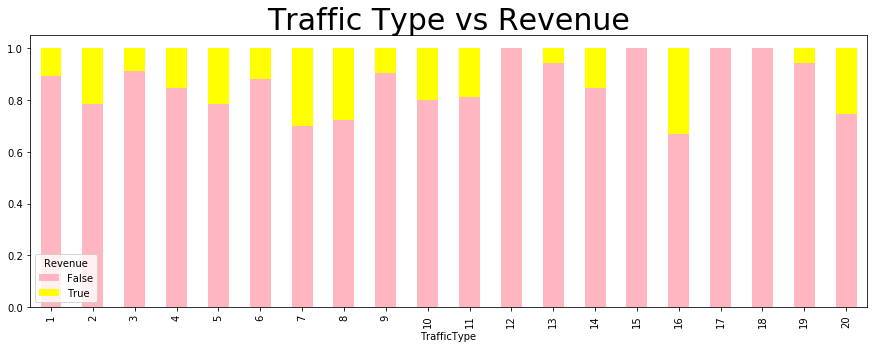

In [24]:
# Traffic Type vs Revenue

df = pd.crosstab(data['TrafficType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightpink', 'yellow'])
plt.title('Traffic Type vs Revenue', fontsize = 30)
plt.show()

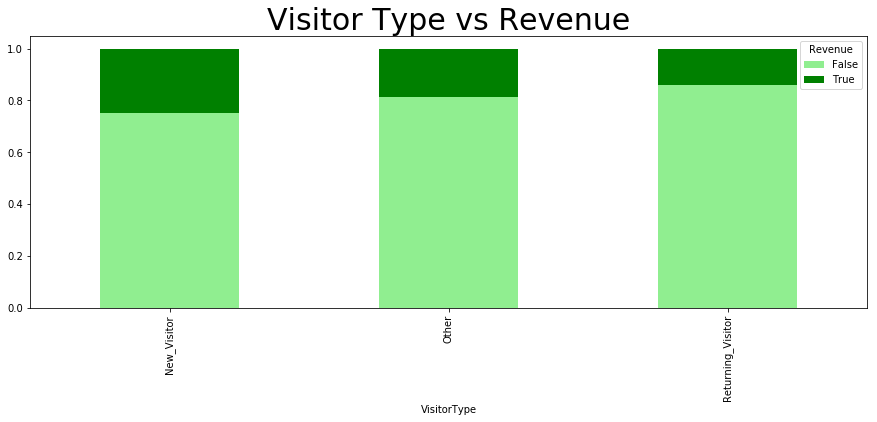

In [25]:
# visitor type vs revenue

df = pd.crosstab(data['VisitorType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()


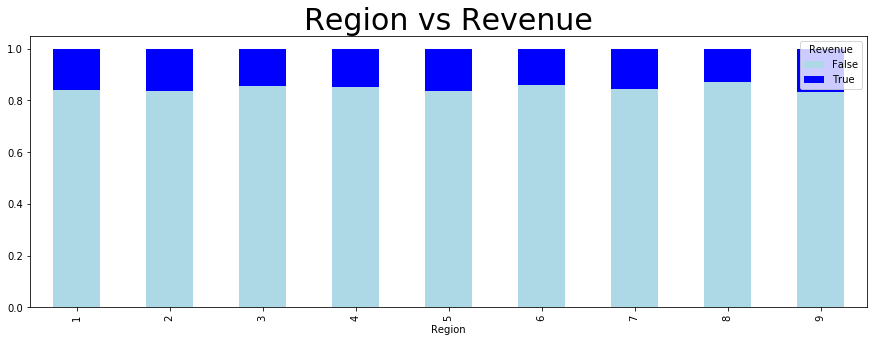

In [26]:
# region vs Revenue

df = pd.crosstab(data['Region'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

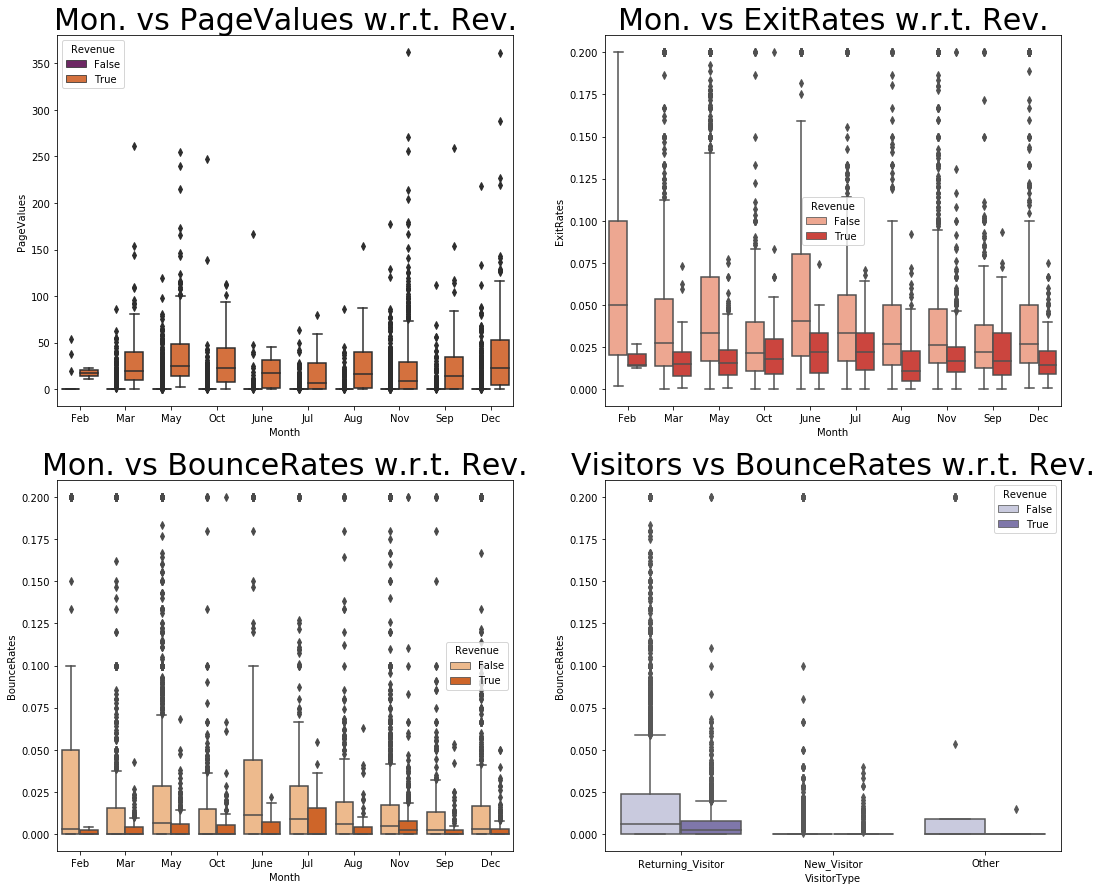

In [27]:
# month vs pagevalues wrt revenue

plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.boxplot(x = data['Month'], y = data['PageValues'], hue = data['Revenue'], palette = 'inferno')
plt.title('Mon. vs PageValues w.r.t. Rev.', fontsize = 30)

# month vs exitrates wrt revenue
plt.subplot(2, 2, 2)
sns.boxplot(x = data['Month'], y = data['ExitRates'], hue = data['Revenue'], palette = 'Reds')
plt.title('Mon. vs ExitRates w.r.t. Rev.', fontsize = 30)

# month vs bouncerates wrt revenue
plt.subplot(2, 2, 3)
sns.boxplot(x = data['Month'], y = data['BounceRates'], hue = data['Revenue'], palette = 'Oranges')
plt.title('Mon. vs BounceRates w.r.t. Rev.', fontsize = 30)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 4)
sns.boxplot(x = data['VisitorType'], y = data['BounceRates'], hue = data['Revenue'], palette = 'Purples')
plt.title('Visitors vs BounceRates w.r.t. Rev.', fontsize = 30)

plt.show()

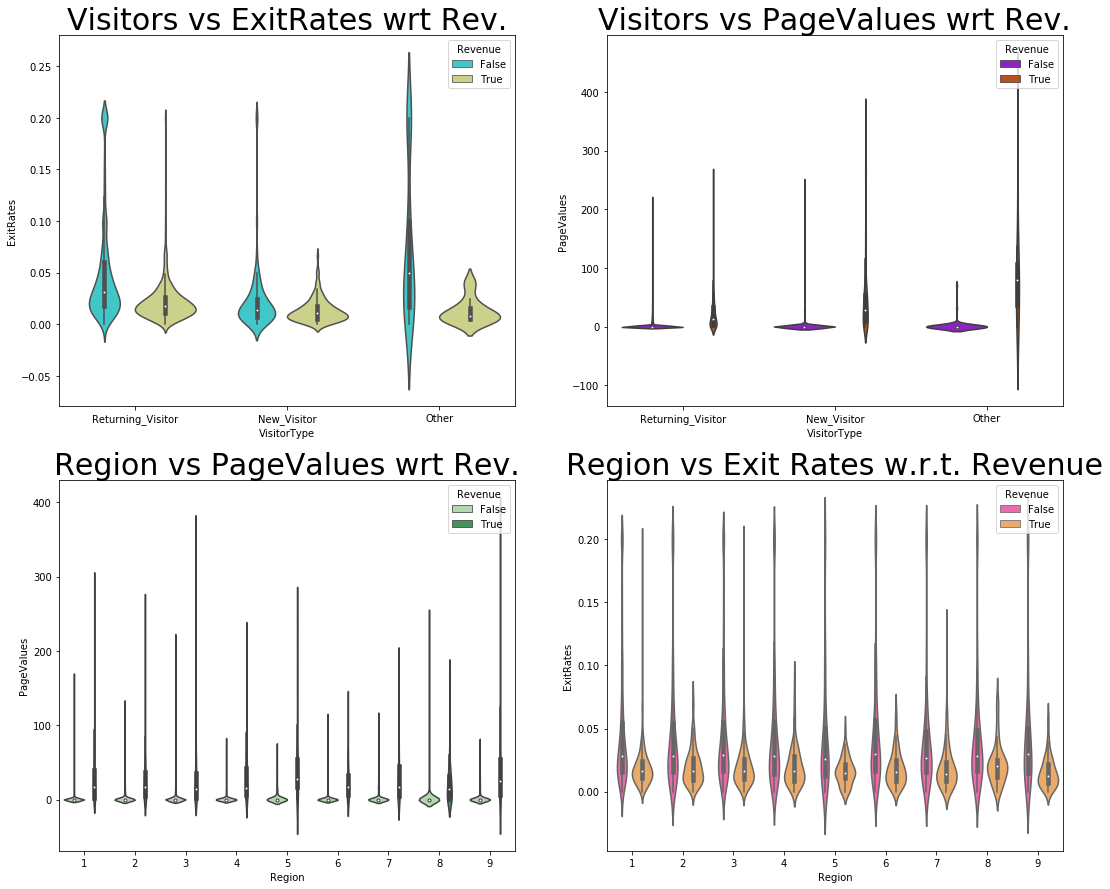

In [28]:
# visitor type vs exit rates w.r.t revenue

plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.violinplot(x = data['VisitorType'], y = data['ExitRates'], hue = data['Revenue'], palette = 'rainbow')
plt.title('Visitors vs ExitRates wrt Rev.', fontsize = 30)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 2)
sns.violinplot(x = data['VisitorType'], y = data['PageValues'], hue = data['Revenue'], palette = 'gnuplot')
plt.title('Visitors vs PageValues wrt Rev.', fontsize = 30)

# region vs pagevalues w.r.t. revenue
plt.subplot(2, 2, 3)
sns.violinplot(x = data['Region'], y = data['PageValues'], hue = data['Revenue'], palette = 'Greens')
plt.title('Region vs PageValues wrt Rev.', fontsize = 30)

#region vs exit rates w.r.t. revenue
plt.subplot(2, 2, 4)
sns.violinplot(x = data['Region'], y = data['ExitRates'], hue = data['Revenue'], palette = 'spring')
plt.title('Region vs Exit Rates w.r.t. Revenue', fontsize = 30)

plt.show()

In [29]:
data.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [30]:
# this will display total number of null
data.isnull().sum().sum()

112

In [31]:
# Imputing the Null values

data["Administrative"].unique()

array([ 0.,  1.,  2.,  4., 12.,  3., 10.,  6.,  5.,  9.,  8., 16., 13.,
       11.,  7., 18., 14., 17., 19., 15., nan, 24., 22., 21., 20., 23.,
       27., 26.])

In [32]:
data["Administrative_Duration"].unique()

array([  0.       ,  -1.       ,  53.       , ..., 167.9107143,
       305.125    , 150.3571429])

In [33]:
data['Informational_Duration'].unique()

array([  0.  ,  -1.  , 120.  , ..., 547.75, 368.25, 211.25])

In [34]:
data['ProductRelated'].unique()

array([  1.,   2.,  10.,  19.,   3.,  16.,   7.,   6.,  23.,  13.,  20.,
         8.,   5.,  32.,   4.,  45.,  14.,  52.,   9.,  46.,  15.,  22.,
        11.,  12.,  36.,  42.,  27.,  90.,  18.,  38.,  17., 128.,  25.,
        30.,  21.,  51.,  26.,  28.,  31.,  24.,  50.,  96.,  49.,  68.,
        98.,  67.,  55.,  35.,  37.,  29.,  34.,  71.,  63.,  87.,  40.,
        33.,  54.,  64.,  75.,  39., 111.,  81.,  61.,  47.,  44.,  88.,
       149.,  41.,   0.,  79.,  66.,  43., 258.,  80.,  62.,  83., 173.,
        48.,  58.,  57.,  56.,  69.,  82.,  59., 109., 287.,  53.,  84.,
        78., 137., 113.,  89.,  65.,  60.,  nan, 104., 129.,  77.,  74.,
        93.,  76.,  72., 194., 140., 110., 132., 115.,  73., 328., 160.,
        86., 150.,  95., 130., 151., 117., 124., 127., 125., 116., 105.,
        92., 157., 154., 220., 187., 112., 131., 159.,  94., 204., 142.,
       206., 102., 313., 145.,  85.,  97., 198., 181., 126., 106., 101.,
       108., 119.,  70., 122.,  91., 276., 100., 29

In [35]:
data["Informational"].unique()

array([ 0.,  1.,  2.,  4., 16.,  5.,  3., 14.,  6., 12.,  7., nan,  9.,
       10.,  8., 11., 24., 13.])

In [36]:
missing_values_series=data.isnull().sum()
missing_columns=missing_values_series[missing_values_series>0]
missing_columns_df=(missing_columns.sort_values()/df.shape[0])*100
x_col="Attributes"
y_col="Missing Pct %"
missing_columns_df=pd.DataFrame(data=np.column_stack([missing_columns_df.index,missing_columns_df.values]),columns=[x_col,y_col])
missing_columns_df

,Attributes,Missing Pct %
0,Administrative,155.556
1,Administrative_Duration,155.556
2,Informational,155.556
3,Informational_Duration,155.556
4,ProductRelated,155.556
5,ProductRelated_Duration,155.556
6,BounceRates,155.556
7,ExitRates,155.556


In [37]:
data1 = data.fillna(data.mean())

In [38]:
data1.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [39]:
data1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [40]:
# The revenue and weekend attributes which are string types are converted to integer values
data1['Revenue'] = data1['Revenue'].astype(int)
data1['Weekend'] = data1['Weekend'].astype(int)
data1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


Text(0, 0.5, 'Total Revenue')

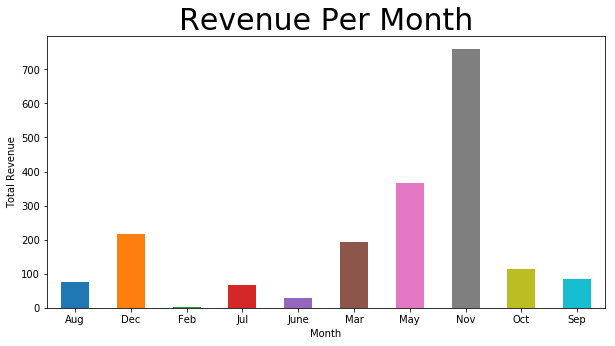

In [41]:
# Total Revenue by month.

monthly_revenue = data1.groupby(['Month'])[['Revenue']].agg('sum')
graph = monthly_revenue.unstack().plot(kind='bar', figsize=(10,5))
plt.xticks(np.arange(10), sorted(data1.Month.unique()), rotation=0)
graph.set_xlabel('Month')
plt.title('Revenue Per Month', fontsize = 30)
graph.set_ylabel('Total Revenue')


from the above Graph we can see that the highest Revenue is in Nov Month

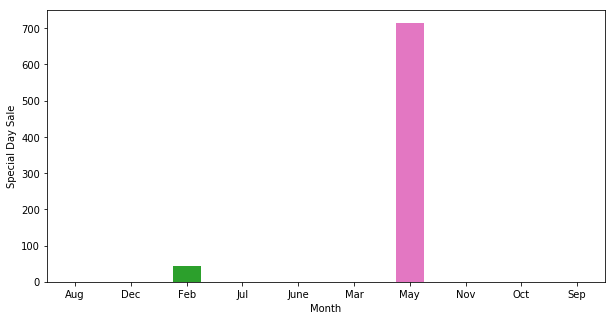

In [42]:
# The distribution of special days
specialDay_data = data1.groupby(['Month'])[['SpecialDay']].agg('sum')
graph = specialDay_data.unstack().plot(kind='bar', figsize=(10,5))
plt.xticks(np.arange(10), sorted(data1.Month.unique()), rotation=0)
graph.set_xlabel('Month')
graph.set_ylabel('Special Day Sale')
plt.show()

so When we see our Revenue in Special Day and Special Day we are taking from our data, From the Graph May and Fab is the special month in which revenue is moslty highly tne all which is quite surprising

27009.85943
0.0
(-0.001, 1.0]          13
(1.0, 2.0]              0
(2.0, 4.0]              0
(4.0, 10.0]             6
(10.0, 23.0]           13
(23.0, 50.0]           17
(50.0, 110.0]          40
(110.0, 243.0]         89
(243.0, 532.0]        285
(532.0, 1167.0]       530
(1167.0, 2558.0]      503
(2558.0, 5608.0]      295
(5608.0, 12291.0]     101
(12291.0, 26940.0]     15
(26940.0, 59049.0]      1
Name: ProductRelated_Duration, dtype: int64


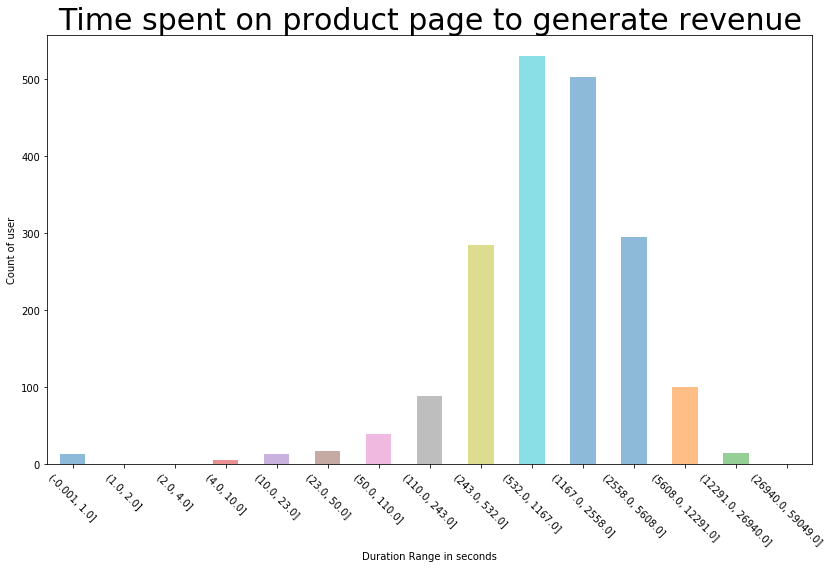

In [43]:
# Users buy a product or not based on how much time he spends on a product page.
product_bought = data1[data1['Revenue'] == True]
print(product_bought['ProductRelated_Duration'].max())
print(product_bought['ProductRelated_Duration'].min())

log_spaced_data = np.logspace(start=0,stop=10,num=15,base=3,dtype='int',
                              endpoint=True)
log_spaced_data = np.append([0],log_spaced_data)
d = pd.cut(product_bought['ProductRelated_Duration'],
           log_spaced_data, right=True,include_lowest=True)
print(d.value_counts(sort=False))
a = d.value_counts(sort=False).plot.bar(rot=-45,alpha=0.5,
                                         figsize=(12,8))
a.set_ylabel('Count of user')
a.set_xlabel('Duration Range in seconds')
plt.title('Time spent on product page to generate revenue', fontsize = 30)
plt.tight_layout()
# plt.savefig("ProductDurationBasedRevenue.png")

In [44]:
# now dealing with Outlier
data.shape

(12330, 18)

In [45]:
from scipy import stats

num_col = [feature for feature in data1.columns if data1[feature].dtypes!='O']
data2 = data1[num_col]

z=np.abs(stats.zscore(data2))
filtered_entries = (z < 3).all(axis=1)
df1 = data1[filtered_entries]
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,0,0
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,0,0


In [46]:
df1.shape

(9579, 18)

Actually we had total 12330 rows and 18 columns after removing the outlier by using the zscore technique now we have 9579 row and 18 columns

### Pearson Correlation Method

Text(0, 0.5, 'Feature Importance')

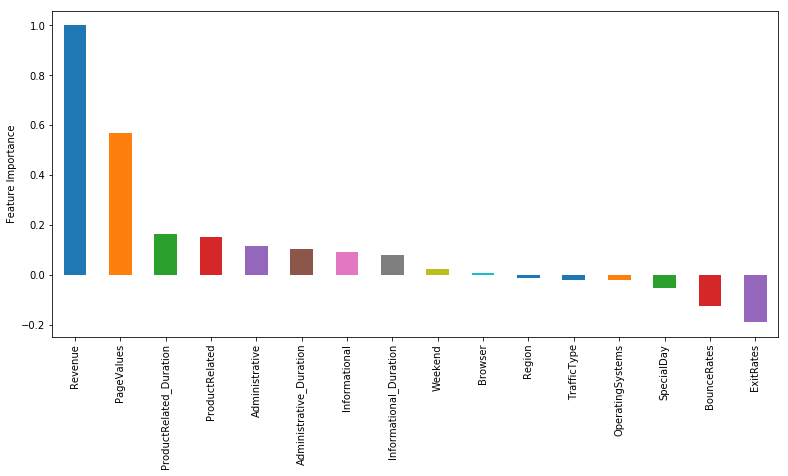

In [47]:
plt.figure(figsize=(13,6))
df1.corr()['Revenue'].sort_values(ascending = False).plot(kind='bar')
plt.ylabel('Feature Importance')

- PageValues, ProductRelated_Duration and ProductRelated seem to be positively correlated with Revenue type. While, ExitRates, bounceRates and SpecialDay seem to be negatively correlated with Revenue type.
- Interstingly, Administrative, Administrativeduration and informational shows less correlation with Revenue Type 

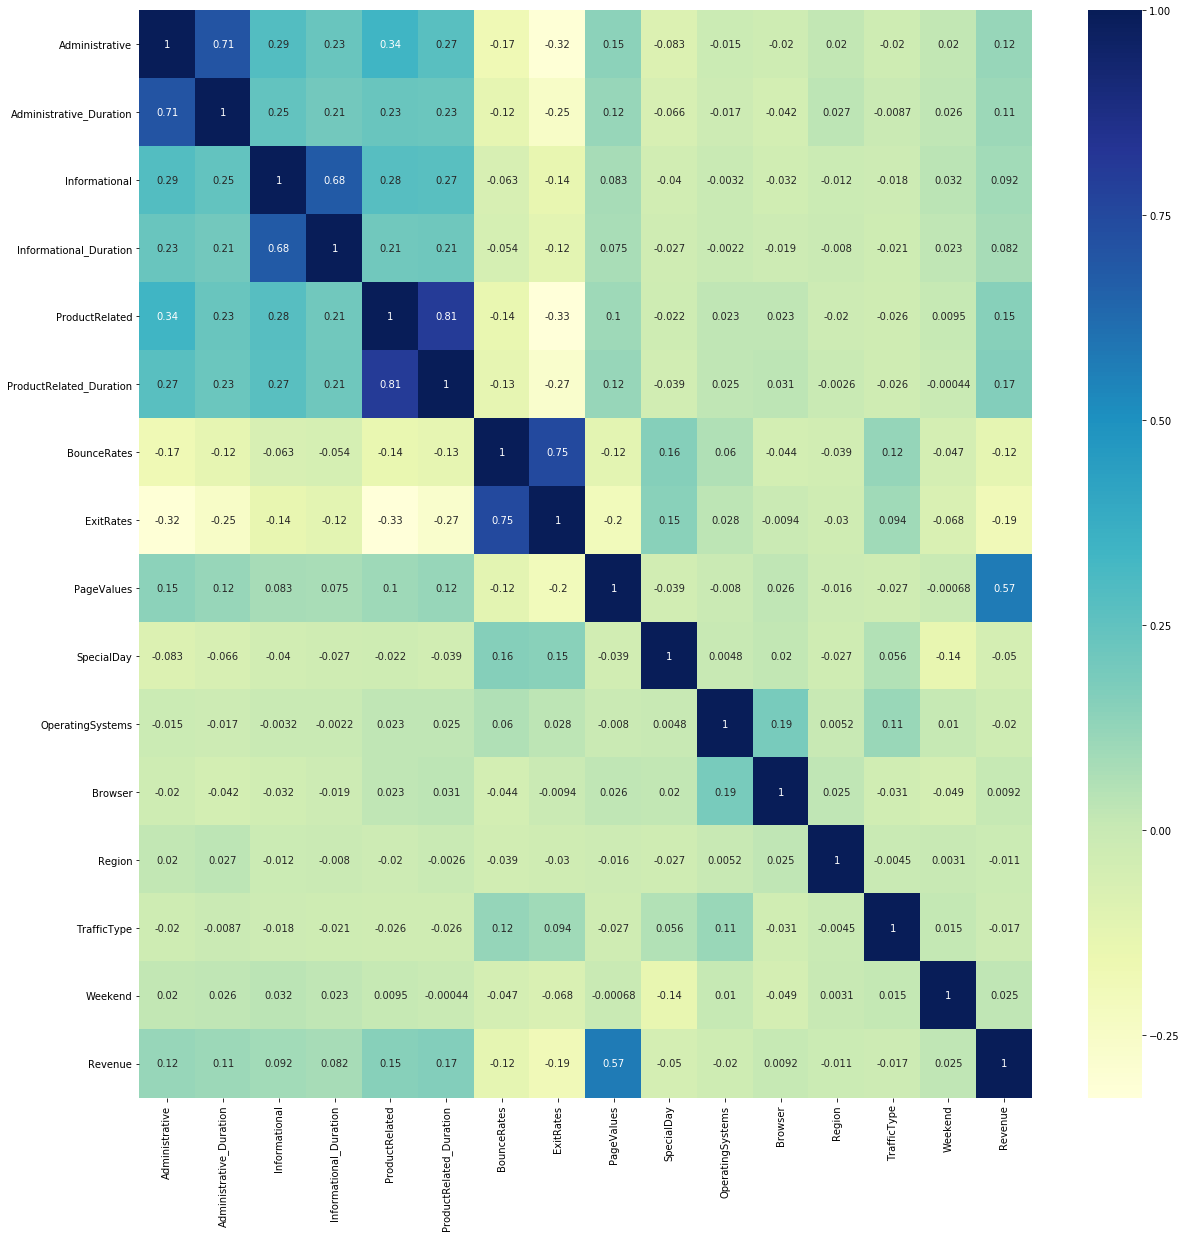

In [48]:
correlations=df1.corr()
correlations

plt.figure(figsize=(20,20))
sns.heatmap(correlations,xticklabels=correlations.columns,yticklabels=correlations.columns,annot=True, cmap="YlGnBu")

In [49]:
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,0,0
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,0,0


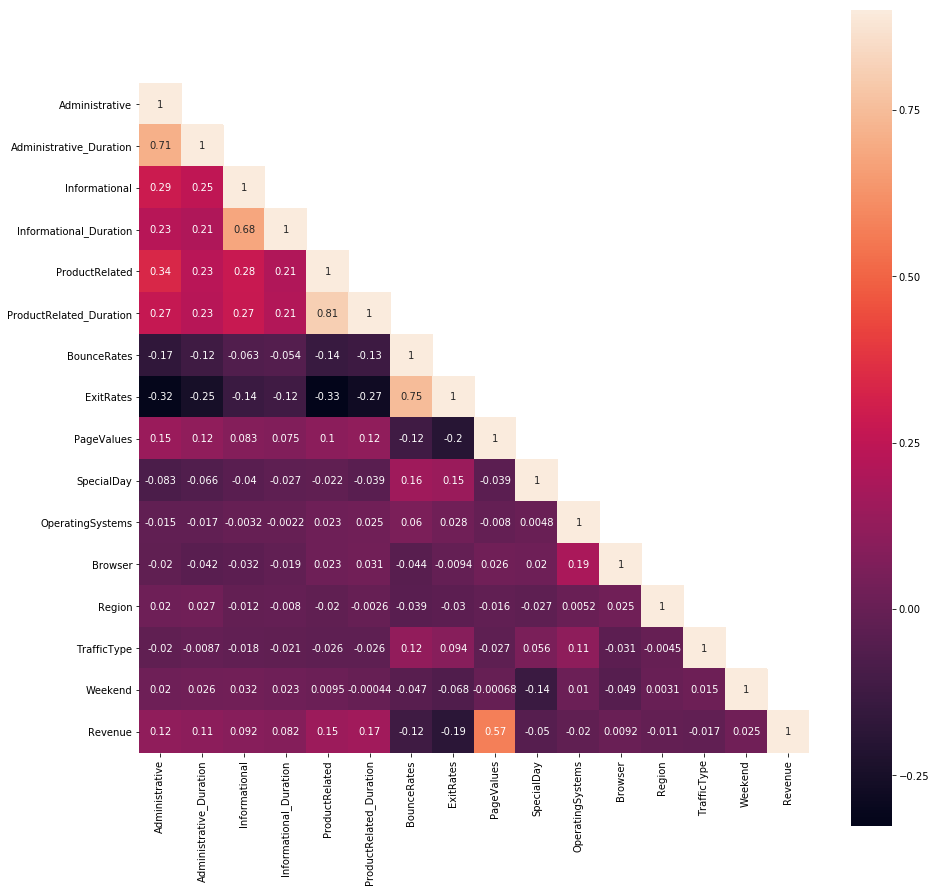

In [50]:
#create correlation
corr = df1.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

The heatmap shows best correlation between Revenue  and Page Values so from that heapmap we will select the best from the postive and negative correlated features

No handles with labels found to put in legend.


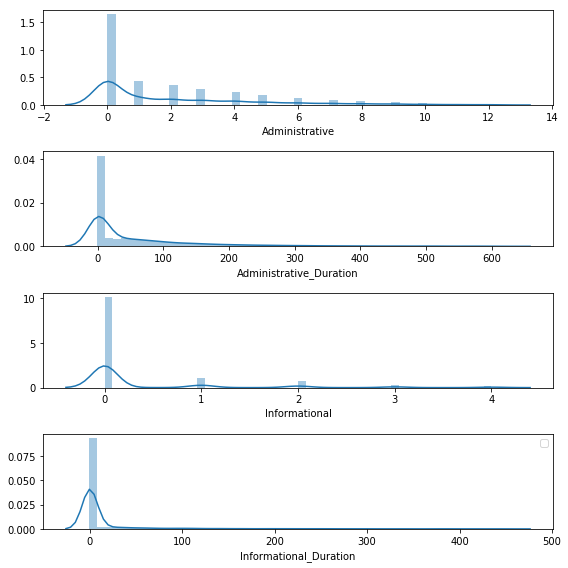

In [51]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8,8))
sns.distplot(df1["Administrative"], ax=ax1)
sns.distplot(df1["Administrative_Duration"], ax=ax2)
sns.distplot(df1["Informational"], ax=ax3)
sns.distplot(df1["Informational_Duration"], ax=ax4)

plt.tight_layout()
plt.legend()

No handles with labels found to put in legend.


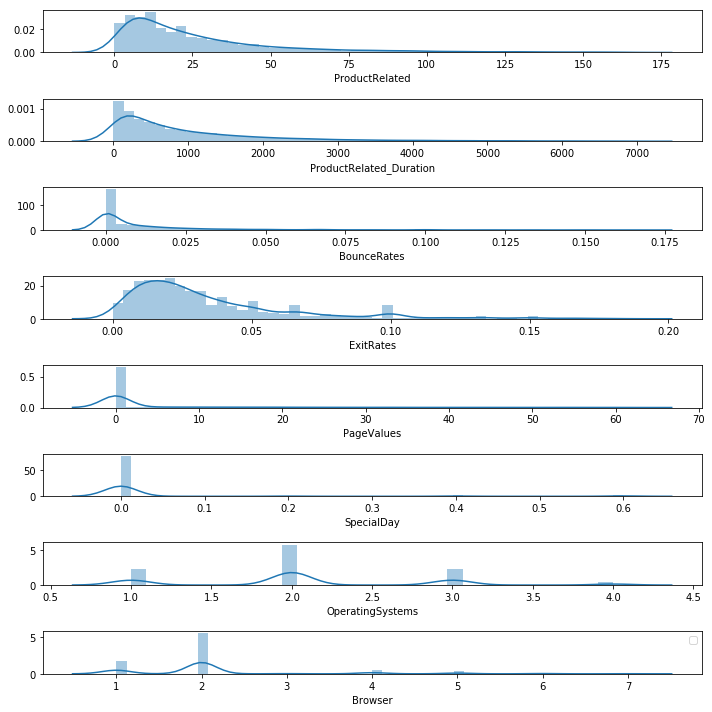

In [52]:
fig, (ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12) = plt.subplots(8,1, figsize=(10,10))
sns.distplot(df1["ProductRelated"], ax=ax5)
sns.distplot(df1["ProductRelated_Duration"], ax=ax6)
sns.distplot(df1["BounceRates"], ax=ax7)
sns.distplot(df1["ExitRates"], ax=ax8)
sns.distplot(df1["PageValues"], ax=ax9)
sns.distplot(df1["SpecialDay"], ax=ax10)
sns.distplot(df1["OperatingSystems"], ax=ax11)
sns.distplot(df1["Browser"], ax=ax12)
plt.tight_layout()
plt.legend()

In [53]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [54]:
unused_Columns = ["Month", "VisitorType", "Revenue"]

df2 = df1.drop(columns = unused_Columns)

In [55]:
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2,2,1,2,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,3,2,2,4,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,3,3,1,4,1
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,2,2,1,3,0
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,2,4,1,2,0


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(df2)

C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [57]:
cluster_scaled

array([[-0.75706081, -0.61448656, -0.41495509, ..., -0.89220532,
        -0.51639801, -0.54441392],
       [-0.75706081, -0.61448656, -0.41495509, ..., -0.47084582,
         0.07657448, -0.54441392],
       [-0.75706081, -0.61448656, -0.41495509, ..., -0.89220532,
         0.07657448,  1.83683766],
       ...,
       [-0.75706081, -0.61448656, -0.41495509, ..., -0.89220532,
         2.74495072,  1.83683766],
       [ 0.71320538,  0.14239098, -0.41495509, ..., -0.04948632,
         2.15197822, -0.54441392],
       [-0.75706081, -0.61448656, -0.41495509, ..., -0.89220532,
        -0.51639801,  1.83683766]])

# Models:

### K-Means Algorithm

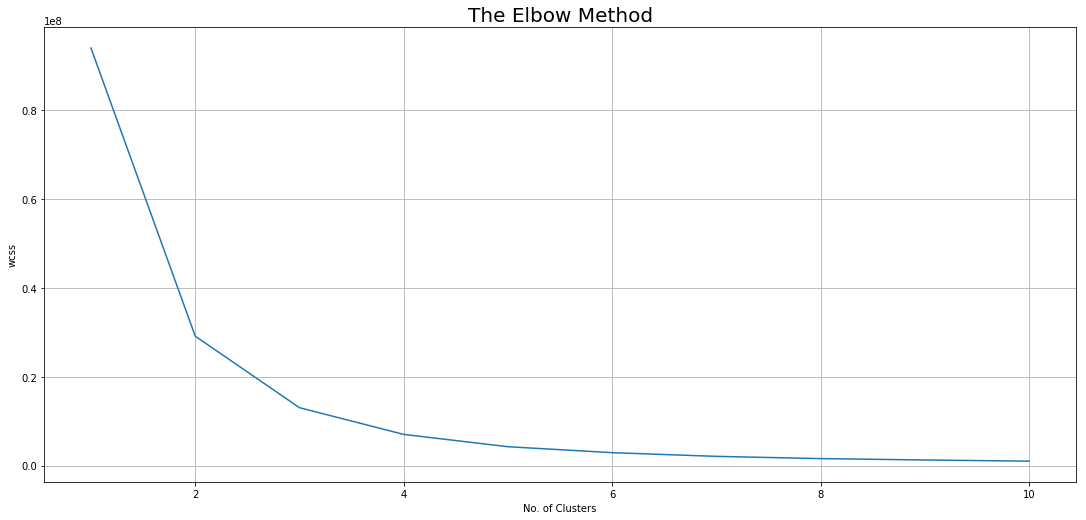

In [58]:
# Q1: Time Spent by The Users on Website vs Bounce Rates

'''
Bounce Rate :The percentage of visitors to a particular website who navigate away from the site after 
viewing only one page.
'''
# let's cluster Administrative duration and Bounce Ratw to different types of clusters in the dataset.
# preparing the dataset
x = df2.iloc[:, [1, 6]].values

# checking the shape of the dataset
x.shape


from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

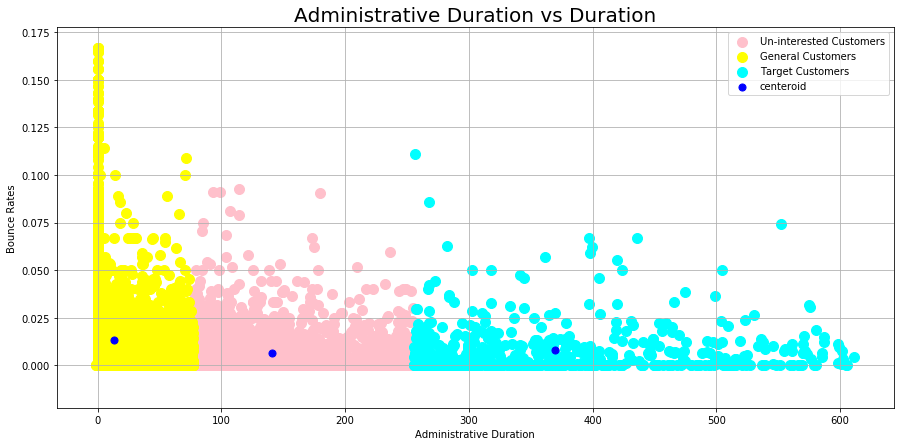

In [59]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

**By,  Looking at this Clustering plot, we can say confindently say that the customers who spent a longer administrative duration in a website are very less likely to bounce from the website that is navigating away from the website just after navigating one page of that website.**

**There are Three Groups, The Pink Group is a group of customers who stay for shortest adminstrative duration and have highest chance for Navigating away from a w**

### Validation Clustering using silhoutte Score and other methods also

In [61]:
from sklearn import metrics

In [62]:
labels = km.labels_
metrics.silhouette_score(x, labels, metric='euclidean')

0.7251896551421609

**Advancetages:**

The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

**Drawbacks**

The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

### Calinski-Harabasz Index

In [63]:
metrics.calinski_harabaz_score(x,labels)

29746.023539349586

The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

The score is fast to compute.

Drawbacks

The Calinski-Harabasz index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [64]:
from sklearn.metrics import davies_bouldin_score

In [65]:
davies_bouldin_score(x, labels)

C:\Users\Ahmed_Ayaz\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


0.502121686666725

The computation of Davies-Bouldin is simpler than that of Silhouette scores.

The index is computed only quantities and features inherent to the dataset.

### Informative Duration vs Bounce Rates

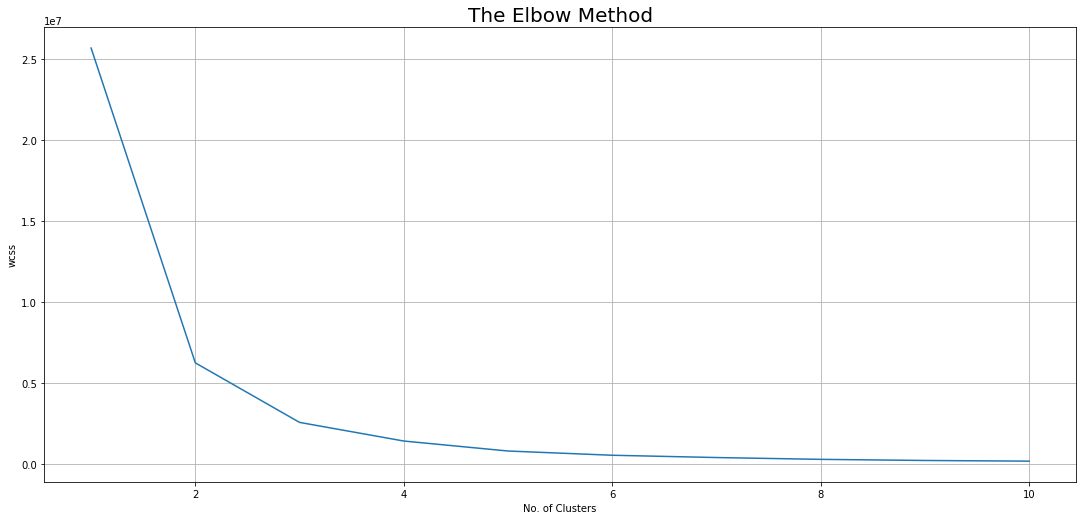

In [66]:
# informational duration vs Bounce Rates
x = df2.iloc[:, [3, 6]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

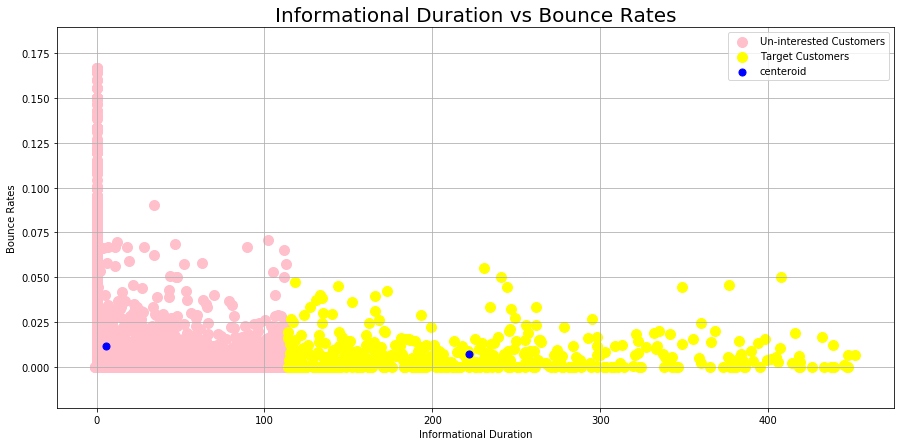

In [67]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

### Administrative Duration vs Exit Rates

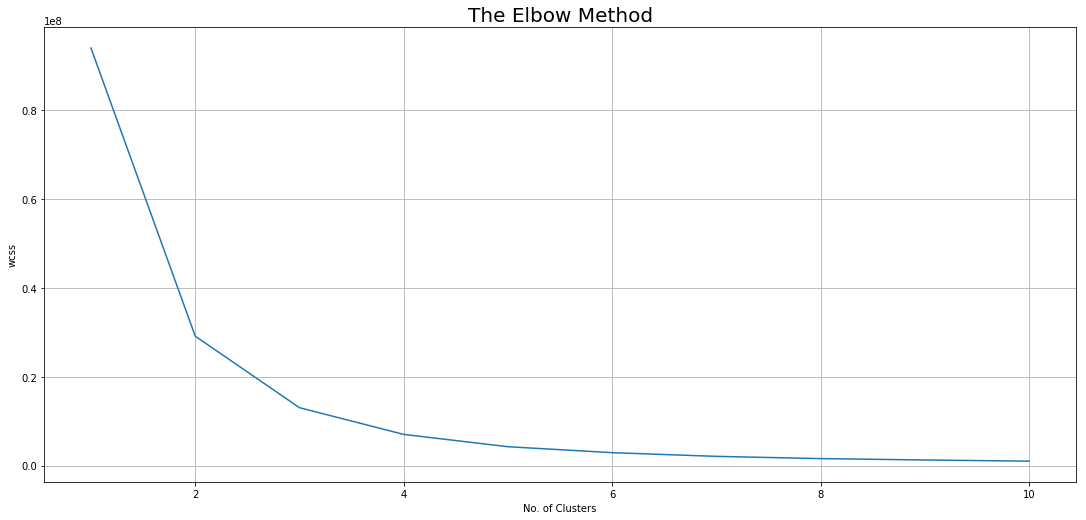

In [68]:
# informational duration vs Bounce Rates
x = df2.iloc[:, [1, 7]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

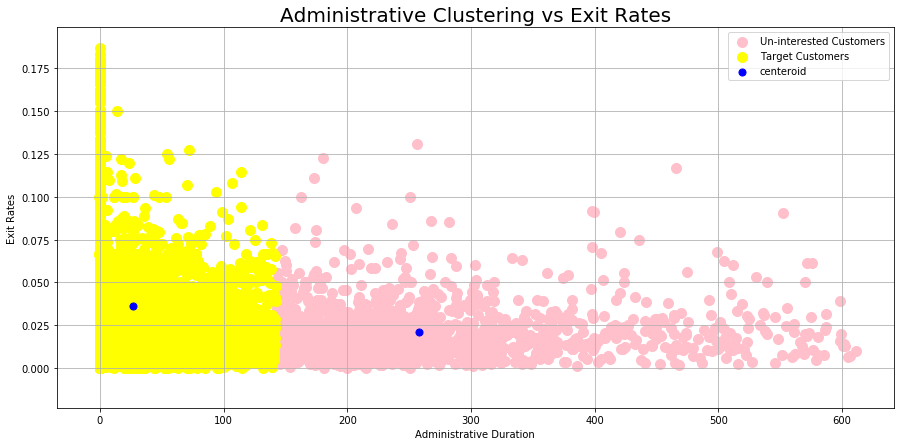

In [69]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Clustering vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()

### Where from the Users of the Website come?

#### 1. Region vs Traffic Type

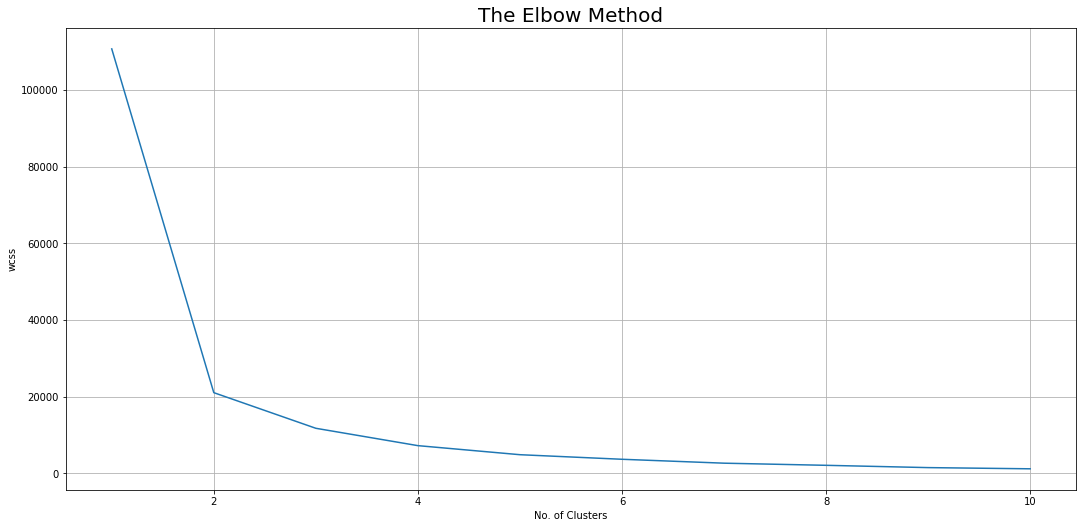

In [70]:
# informational duration vs Bounce Rates
x = df2.iloc[:, [13, 14]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

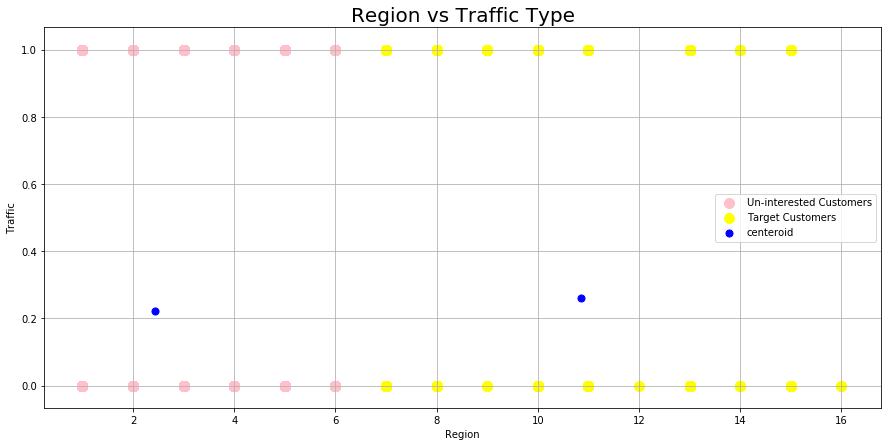

In [71]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Region vs Traffic Type', fontsize = 20)
plt.grid()
plt.xlabel('Region')
plt.ylabel('Traffic')
plt.legend()
plt.show()

#### 2. Adminstrative Duration vs Region

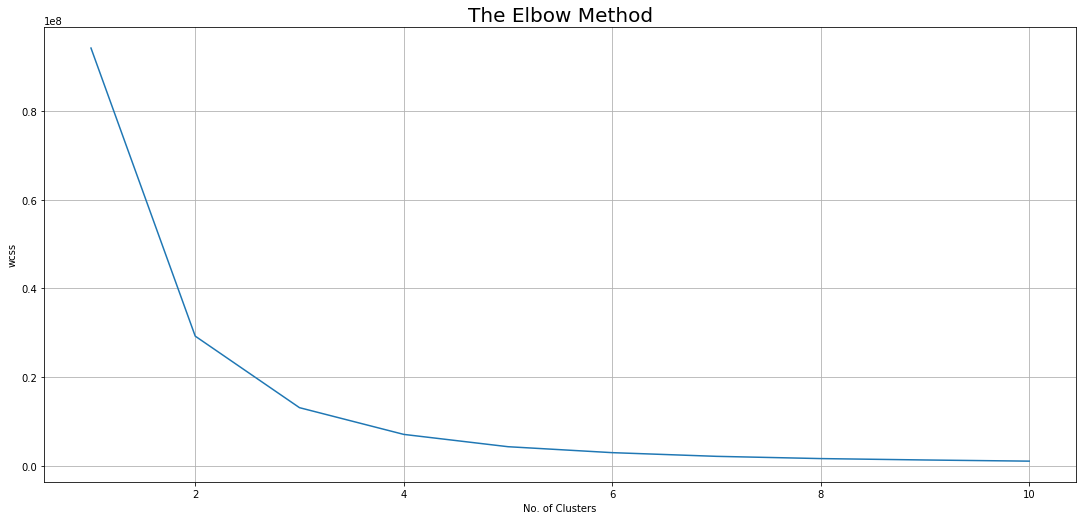

In [72]:
# informational duration vs Bounce Rates
x = df2.iloc[:, [1, 13]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

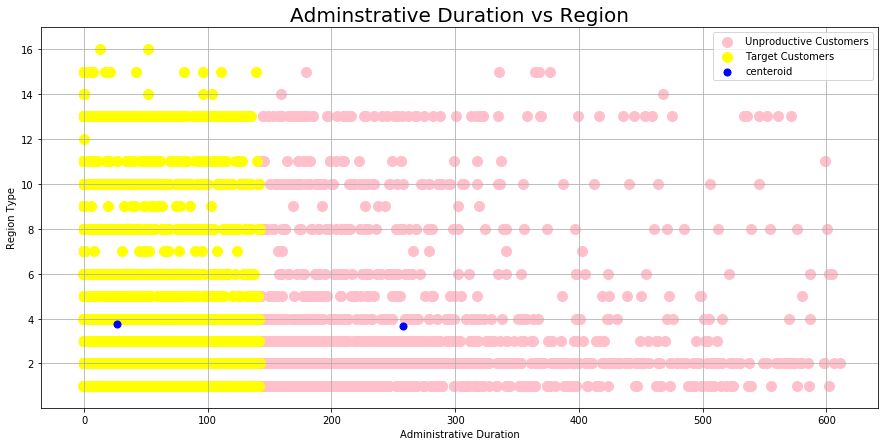

In [73]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Unproductive Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Adminstrative Duration vs Region', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Region Type')
plt.legend()
plt.show()

Tried different different kind of cluster to see more close relation between the features and cluster their centriod point. 

### Hierarchical Clustering

In [74]:
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2,2,1,2,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,3,2,2,4,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,3,3,1,4,1
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,2,2,1,3,0
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,2,4,1,2,0


In [75]:
# creating model with complete linkage

model1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')

In [76]:
model1.fit(df2)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=2, pooling_func='deprecated')

In [77]:
L = pd.DataFrame(model1.labels_)
L[0].value_counts()

1    9037
0     542
Name: 0, dtype: int64

In [78]:
# creating model with single linkage

model2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
model2.fit(df2)

L2 = pd.DataFrame(model2.labels_)
L2[0].value_counts()

0    9578
1       1
Name: 0, dtype: int64

In [79]:
# creating model with ward linkage

model3 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model3.fit(df2)

L3 = pd.DataFrame(model3.labels_)
L3[0].value_counts()

0    8883
1     696
Name: 0, dtype: int64

In [80]:
# creating model with average linkage

model4 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
model4.fit(df2)

L4 = pd.DataFrame(model4.labels_)
L4[0].value_counts()

0    9389
1     190
Name: 0, dtype: int64

 It is quite clear that ward linkage is giving the best clusters out of all the linkages, hence using ward for creating dendogram 

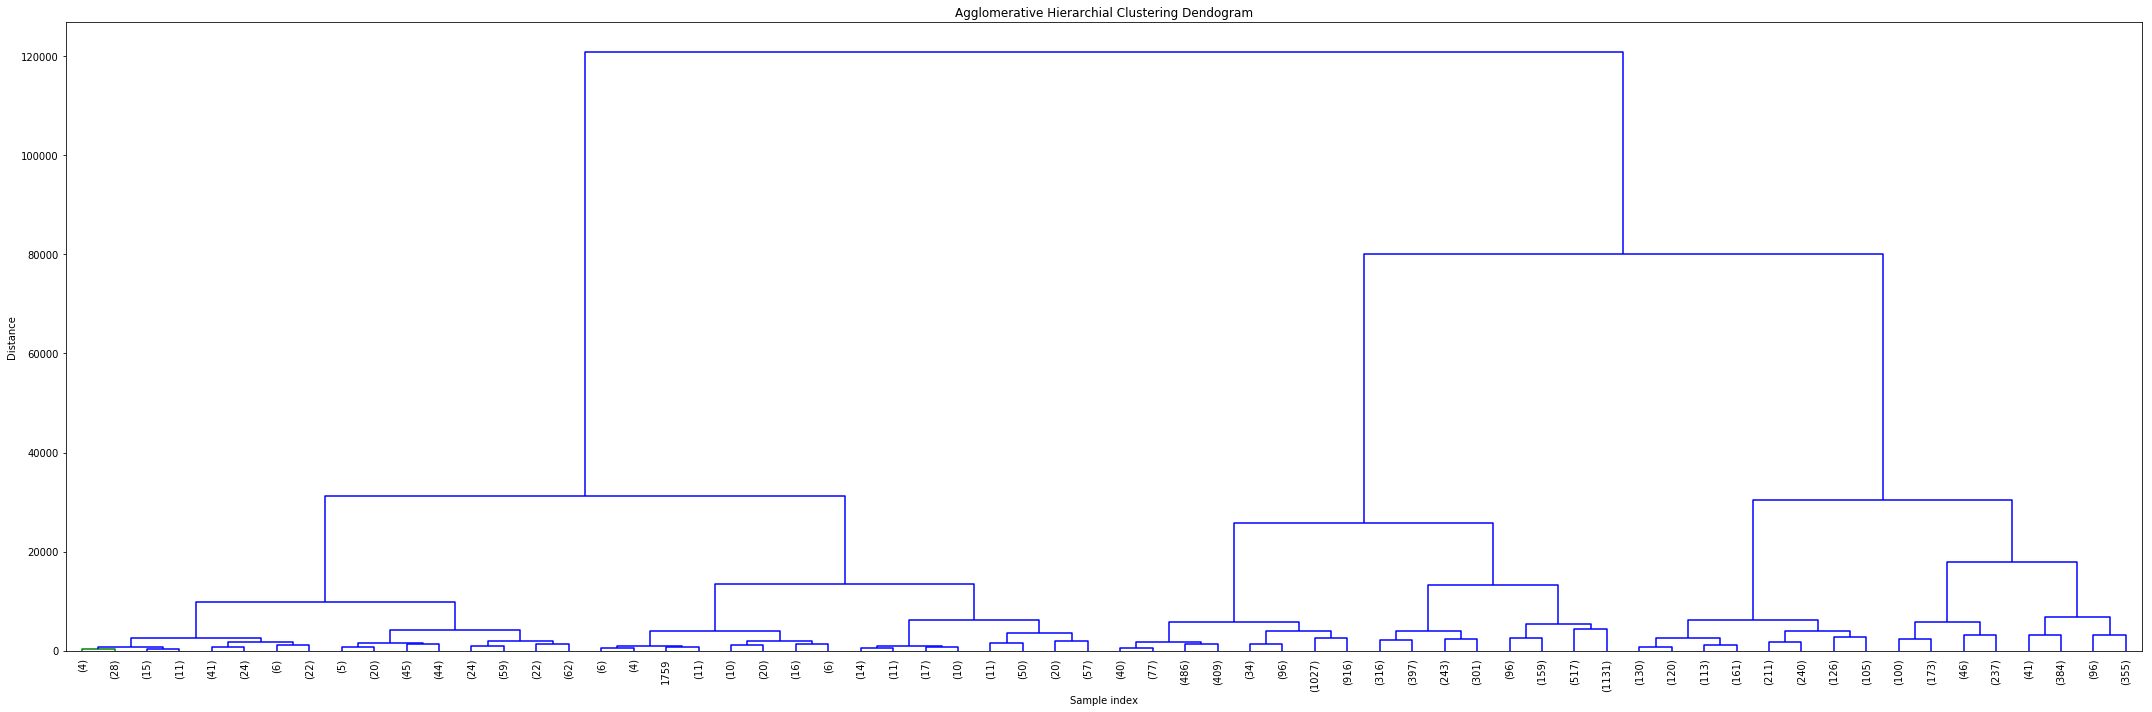

In [81]:
plt.figure(figsize = (30,10))
plt.title('Agglomerative Hierarchial Clustering Dendogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
Z = linkage(df2.iloc[:,:-1], 'ward')
dendrogram(Z, leaf_rotation = 90.0, p = 5, color_threshold =400,leaf_font_size = 10, truncate_mode = 'level')
plt.tight_layout()

### DBSCAN

In [82]:
from sklearn.cluster import DBSCAN

model = DBSCAN()
model.fit(df2)
dbs_labels = model.labels_

DBSCAN


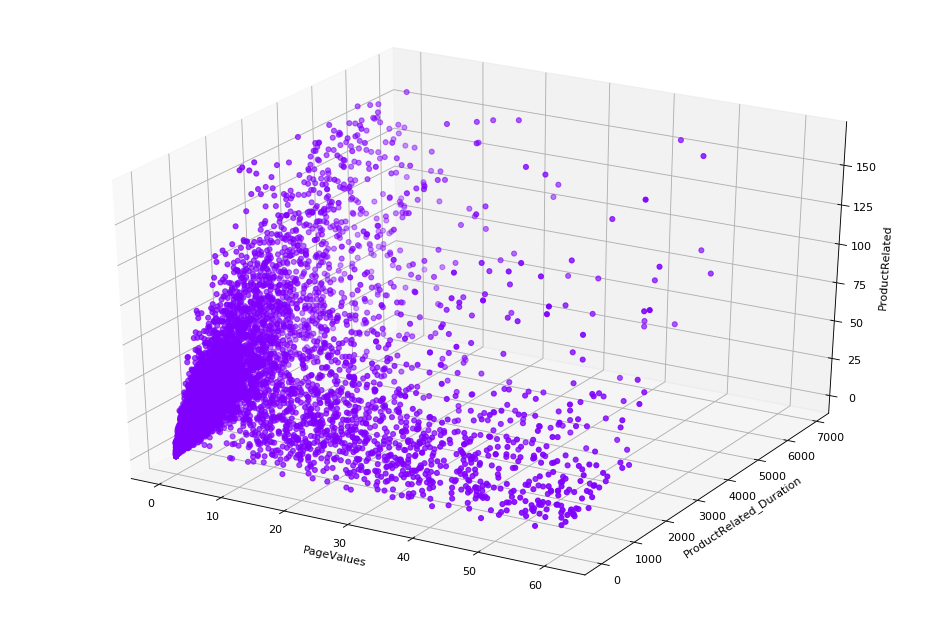

In [83]:
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df2['PageValues'],df2['ProductRelated_Duration'],df2['ProductRelated'],c=dbs_labels, cmap='rainbow')

xLabel = ax.set_xlabel('PageValues', linespacing=3.2)
yLabel = ax.set_ylabel('ProductRelated_Duration', linespacing=3.1)
zLabel = ax.set_zlabel('ProductRelated', linespacing=3.4)
print("DBSCAN")

From the figure above we can see that DBSCAN is not suitable for this dataset.

## Gaussian Mixture Models

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
 
X_train = df2

In [85]:
#try without covariance full
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42 )
gmm.fit(X_train)


print(gmm.means_)
print('\n')
print(gmm.covariances_)

[[1.40009458e+00 4.01930694e+01 0.00000000e+00 0.00000000e+00
  2.06062999e+01 7.37323680e+02 1.37133603e-02 3.96468421e-02
  0.00000000e+00 3.47798266e-02 2.09083559e+00 2.12454101e+00
  3.13418991e+00 3.84282413e+00 2.19641489e-01]
 [3.63862781e+00 1.10083654e+02 1.31360411e+00 7.40068986e+01
  5.12184529e+01 1.96742183e+03 6.13843448e-03 2.07504235e-02
  1.14794972e+01 0.00000000e+00 2.07567955e+00 2.47438492e+00
  3.08783204e+00 3.46857604e+00 5.25153320e-01]
 [3.28500657e+00 9.96588837e+01 8.61933735e-01 2.33874041e+01
  3.25138170e+01 1.20323123e+03 7.95266593e-03 2.46813786e-02
  1.35587023e+01 4.12545590e-02 2.07172202e+00 1.81741399e+00
  3.07698989e+00 3.58166970e+00 0.00000000e+00]]


[[[ 4.81469224e+00  1.21459580e+02  0.00000000e+00  0.00000000e+00
    1.01967437e+01  2.71556439e+02 -9.15990883e-03 -2.28454250e-02
    0.00000000e+00 -2.62272280e-02 -4.08779360e-02 -4.48448253e-02
    1.87901853e-01 -1.71666356e-01  2.68643335e-02]
  [ 1.21459580e+02  5.93946714e+03  0.0000

 Guassioan Mixture Models


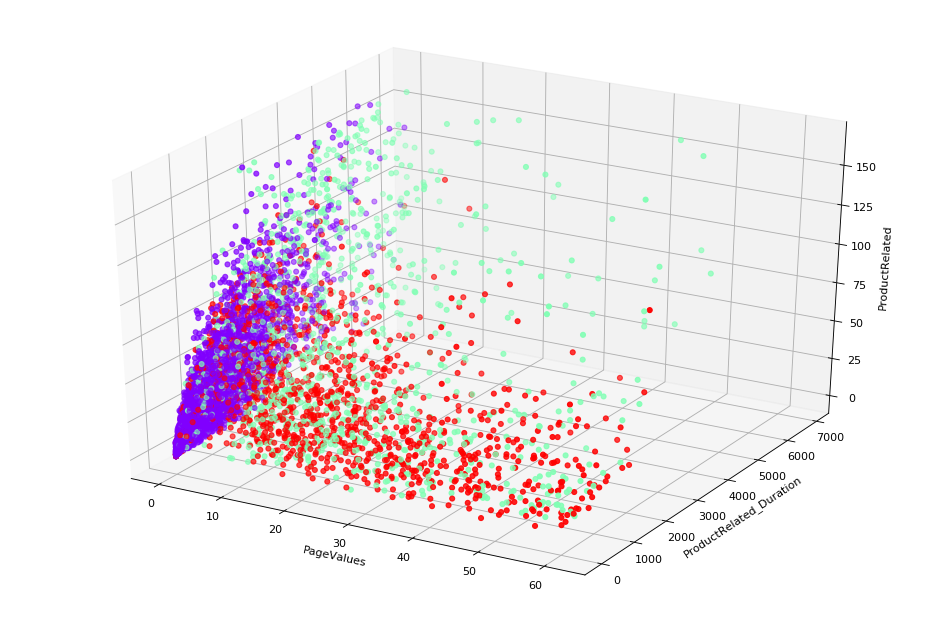

In [86]:
labels = gmm.predict(X_train)
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")


ax.scatter3D(df2['PageValues'],df2['ProductRelated_Duration'],df2['ProductRelated'],c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('PageValues', linespacing=3.2)
yLabel = ax.set_ylabel('ProductRelated_Duration', linespacing=3.1)
zLabel = ax.set_zlabel('ProductRelated', linespacing=3.4)
print(" Guassioan Mixture Models") 

In [87]:
DS2_clustered_hac = df2.assign(Cluster=labels)
grouped_hac = DS2_clustered_hac.groupby(['Cluster']).mean().round(1)
grouped_hac

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
Cluster,,,,,,,,,,,,,,,
0,1.4,40.2,0.0,0.0,20.6,737.5,0.0,0.0,0.0,0.0,2.1,2.1,3.1,3.8,0.2
1,3.6,110.4,1.3,74.6,51.3,1975.2,0.0,0.0,11.5,0.0,2.1,2.5,3.1,3.5,0.5
2,3.3,99.3,0.9,23.4,32.6,1203.7,0.0,0.0,13.5,0.0,2.1,1.8,3.1,3.6,0.0


## Affinity Propogation

In [90]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import AffinityPropagation
from sklearn.metrics.pairwise import euclidean_distances
preference=euclidean_distances(cluster_scaled, cluster_scaled).max()
af = AffinityPropagation()
clustering = af.fit(cluster_scaled)
af.get_params()

{'affinity': 'euclidean',
 'convergence_iter': 15,
 'copy': True,
 'damping': 0.5,
 'max_iter': 200,
 'preference': None,
 'verbose': False}

 Affinity Model


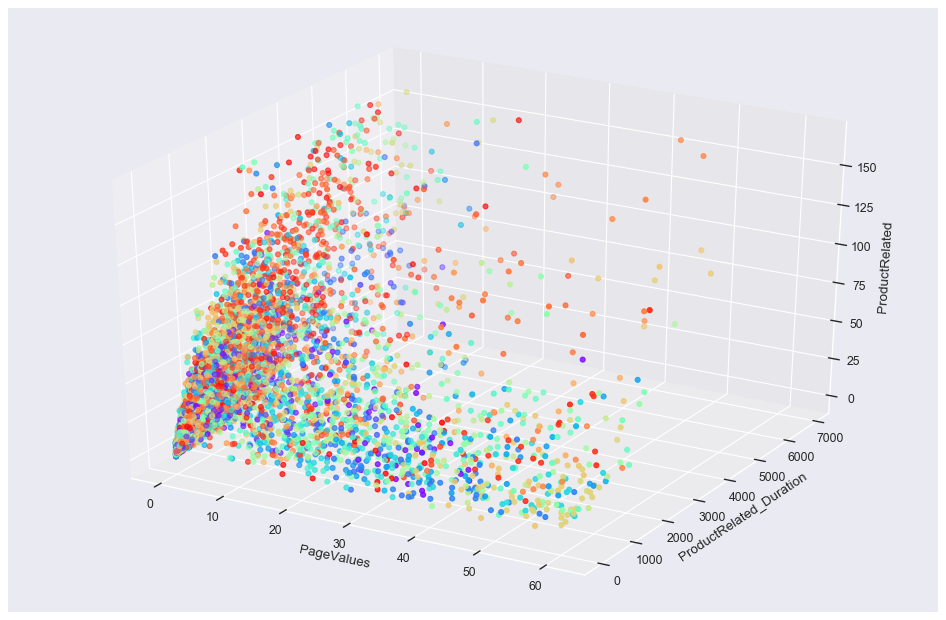

In [91]:
labels = af.predict(cluster_scaled)
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")


ax.scatter3D(df2['PageValues'],df2['ProductRelated_Duration'],df2['ProductRelated'],c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('PageValues', linespacing=3.2)
yLabel = ax.set_ylabel('ProductRelated_Duration', linespacing=3.1)
zLabel = ax.set_zlabel('ProductRelated', linespacing=3.4)
print(" Affinity Model") 

In [92]:
DS2_clustered_hac = df2.assign(Cluster=labels)
grouped_hac = DS2_clustered_hac.groupby(['Cluster']).mean().round(1)
grouped_hac

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
Cluster,,,,,,,,,,,,,,,
0,0.1,0.0,0.0,-0.0,2.7,133.4,0.0,0.1,0.0,0.0,3.1,2.0,2.5,3.0,0.0
1,0.0,0.0,0.1,0.0,4.0,238.5,0.0,0.1,0.0,0.4,2.1,1.8,2.9,3.5,0.0
2,0.1,0.0,0.0,0.0,7.1,239.7,0.1,0.1,0.0,0.5,1.0,1.0,1.5,2.9,0.0
3,3.2,94.2,0.0,0.0,12.0,339.3,0.0,0.0,0.0,0.0,1.0,1.1,2.1,2.7,0.0
4,0.8,18.5,0.2,3.6,24.1,961.2,0.0,0.0,30.9,0.0,2.2,4.7,1.9,3.3,0.0
5,0.2,2.6,0.1,1.3,34.0,1305.2,0.0,0.0,1.7,0.0,2.0,4.1,2.2,2.1,0.0
6,4.0,202.9,1.8,149.1,51.6,2778.1,0.0,0.0,7.2,0.0,1.0,1.2,1.9,2.3,0.0
7,0.2,4.2,0.0,0.0,12.2,350.6,0.0,0.0,0.0,0.0,2.0,2.0,3.9,2.4,0.0
8,0.2,4.7,0.0,3.9,23.5,655.6,0.0,0.0,0.4,0.0,2.0,6.1,1.9,2.1,0.0
